In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
pd.set_option("display.max_columns", None)
df1 = pd.read_csv('/Users/williambrudenell/code/DomNau1001/Risk_ICU/raw_data/training_v2.csv')
df = df1.drop_duplicates()
df
# apache_4a_hospital_death_prob

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.10,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.10,14.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0

In [92]:
df_d1 = df.loc[:, ~df.columns.str.contains('h1', case=False)]
df_d1

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.730000,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.10,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.10,14.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.420000,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1.0,12.70,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,NaN,NaN,159.0,67.0,159.0,67.0,36.3,35.1,1.6,1.6,0.5,0.5,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,1.3,1.3,3.5,3.5,557.0,487.0,4.2,3.8,145.0,145.0,23.30,12.70,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.950000,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,0.0,NaN,NaN,NaN,88.0,48.0,88.0,48.0,96.0,68.0,NaN,NaN,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,NaN,NaN,148.0,105.0,148.0,105.0,37.0,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.640000,1,Caucasian,F,165.1,Operating Room,Operating Room / Recovery,92,admit,CTICU,0.000694,0,61.7,NaN,203.0,1206.03,1,0.0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,4.0,NaN,

In [93]:
# Separate numeric and string columns
df_d1_num = df_d1.select_dtypes(include=[np.number])
df_d1_str = df_d1.select_dtypes(include=[object])

In [112]:
columns_to_drop = []
for column in df_d1.columns.tolist():
    if (df_d1[column].isnull().sum()/df_d1.shape[0]) >= 0.25:
        columns_to_drop.append(column)
columns_to_drop

['albumin_apache',
 'bilirubin_apache',
 'fio2_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'urineoutput_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_mbp_invasive_max',
 'd1_mbp_invasive_min',
 'd1_sysbp_invasive_max',
 'd1_sysbp_invasive_min',
 'd1_albumin_max',
 'd1_albumin_min',
 'd1_bilirubin_max',
 'd1_bilirubin_min',
 'd1_inr_max',
 'd1_inr_min',
 'd1_lactate_max',
 'd1_lactate_min',
 'd1_arterial_pco2_max',
 'd1_arterial_pco2_min',
 'd1_arterial_ph_max',
 'd1_arterial_ph_min',
 'd1_arterial_po2_max',
 'd1_arterial_po2_min',
 'd1_pao2fio2ratio_max',
 'd1_pao2fio2ratio_min']

In [113]:
df_d1_num_filtered = df_d1_num.drop(columns=['encounter_id',
                                             'patient_id',
                                             'hospital_id',
                                             'icu_id',
                                             'albumin_apache',
                                            'bilirubin_apache',
                                            'fio2_apache',
                                            'paco2_apache',
                                            'paco2_for_ph_apache',
                                            'pao2_apache',
                                            'ph_apache',
                                            'urineoutput_apache',
                                            'd1_diasbp_invasive_max',
                                            'd1_diasbp_invasive_min',
                                            'd1_mbp_invasive_max',
                                            'd1_mbp_invasive_min',
                                            'd1_sysbp_invasive_max',
                                            'd1_sysbp_invasive_min',
                                            'd1_albumin_max',
                                            'd1_albumin_min',
                                            'd1_bilirubin_max',
                                            'd1_bilirubin_min',
                                            'd1_inr_max',
                                            'd1_inr_min',
                                            'd1_lactate_max',
                                            'd1_lactate_min',
                                            'd1_arterial_pco2_max',
                                            'd1_arterial_pco2_min',
                                            'd1_arterial_ph_max',
                                            'd1_arterial_ph_min',
                                            'd1_arterial_po2_max',
                                            'd1_arterial_po2_min',
                                            'd1_pao2fio2ratio_max',
                                            'd1_pao2fio2ratio_min'])
df_d1_num_filtered

,hospital_death,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,0,68.0,22.730000,0,180.3,0.541667,0,73.9,113.0,502.01,0,0.0,31.0,2.51,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,36.0,134.0,39.3,0.0,14.10,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,233.0,233.0,4.0,3.4,136.0,134.0,14.10,14.10,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,77.0,27.420000,0,160.0,0.927778,0,70.2,108.0,203.01,0,0.0,9.0,0.56,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,33.0,145.0,35.1,1.0,12.70,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,11.0,9.0,8.6,8.0,0.71,0.56,145.0,128.0,27.0,26.0,11.3,11.1,36.9,36.1,557.0,487.0,4.2,3.8,145.0,145.0,23.30,12.70,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,25.0,31.950000,0,172.7,0.000694,0,95.3,122.0,703.03,0,0.0,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,37.0,NaN,36.7,0.0,NaN,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,81.0,22.640000,1,165.1,0.000694,0,61.7,203.0,1206.03,1,0.0,NaN,NaN,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,4.0,NaN,34.8,1.0,8.00,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,NaN,NaN,NaN,NaN,NaN,NaN,185.0,88.0,NaN,NaN,11.6,8.9,34.0,25.9,198.0,43.0,5.0,3.5,NaN,NaN,9.00,8.00,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,19.0,NaN,0,188.0,0.073611,0,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,16.0,NaN,36.7,0.0,NaN,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,0,75.0,23.060250,0,177.8,0.298611,0,72.9,113.0,501.06,0,0.0,NaN,NaN,4.0,6.0,0.0,5.0,381.0,115.0,NaN,0.0,48.0,9.0,NaN,36.6,1.0,NaN,104.0,44.0,104.0,44.0,115.0,70.0,109.0,48.0,109.0,48.0,27.0,9.0,100.0,85.0,128.0,67.0,128.0,67.0,38.2,36.6,27.0,27.0,8.2,8.2,1.10,1.10,400.0,187.0,28.0,28.0,13.2,13.2,39.0,39.0,92.0,92.0,4.2,4.2,140.0,140.0,5.68,5.68,0.12,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91709,0,56.0,47.179671,0,183.0,0.120139,0,158.0,113.0,501.05,0,0.0,34.0,2.30,4.0,6.0,0.0,5.0,177.0,100.0,33.0,0.0,62.0,33.0,136.0,

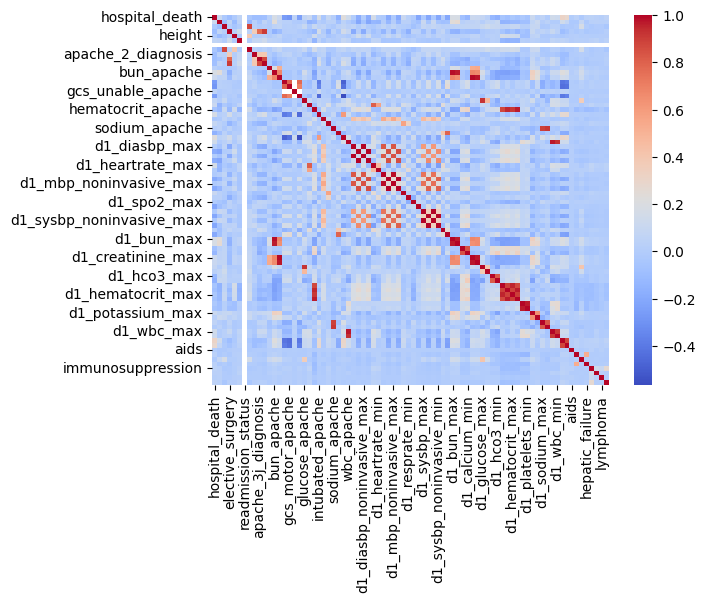

In [118]:
# Create a correlation matrix
correlation_matrix = df_d1_num_filtered.corr()
# Create a heatmap with color gradient
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.show()

In [116]:
import seaborn as sns
import pandas as pd
import numpy as np

# Extract upper triangle of the correlation matrix (excluding diagonal)
mask = np.tril(np.ones(correlation_matrix.shape)).astype(bool)
mask[np.diag_indices_from(mask)] = False  # Exclude diagonal elements
upper_triangle = correlation_matrix[mask]

# Convert upper triangle to a list (using NumPy's reshape and ravel)
correlation_values = upper_triangle.values.reshape(-1)  # Reshape values to 1D array

# Extract corresponding column names based on mask indices
corr_pairs = list(zip(*np.where(correlation_matrix != 1)))  # Avoids self-correlation

# Separate positive and negative correlations
positive_pairs = [(corr, pair) for corr, pair in zip(correlation_values, corr_pairs) if corr > 0]
negative_pairs = [(corr, pair) for corr, pair in zip(correlation_values, corr_pairs) if corr < 0]

# Sort by correlation values (descending order for positive, ascending for negative)
sorted_positive_pairs = sorted(positive_pairs, key=lambda x: x[0], reverse=True)
sorted_negative_pairs = sorted(negative_pairs, key=lambda x: abs(x[0]), reverse=True)

print("Top 10 Positive Correlations:")
for i in range(10):
  corr, (col1_idx, col2_idx) = sorted_positive_pairs[i]
  col1 = df_d1_num.columns[col1_idx]  # Get header names using indices
  col2 = df_d1_num.columns[col2_idx]
  print(f"{col1} - {col2}: {corr:.2f}")  # Format correlation value to 2 decimal places

print("\nTop 10 Largest Negative Correlations:")
for i in range(10):
  corr, (col1_idx, col2_idx) = sorted_negative_pairs[i]
  col1 = df_d1_num.columns[col1_idx]
  col2 = df_d1_num.columns[col2_idx]
  print(f"{col1} - {col2}: {corr:.2f}")  # Format correlation value to 2 decimal places


Top 10 Positive Correlations:
encounter_id - hospital_id: 1.00
patient_id - age: 1.00
hospital_id - bmi: 1.00
hospital_death - height: 1.00
age - icu_id: 1.00
bmi - pre_icu_los_days: 1.00
elective_surgery - readmission_status: 1.00
height - weight: 1.00
icu_id - albumin_apache: 1.00
pre_icu_los_days - apache_2_diagnosis: 1.00

Top 10 Largest Negative Correlations:
d1_albumin_min - d1_diasbp_noninvasive_min: -0.24
d1_bilirubin_max - d1_heartrate_max: -0.24
d1_bilirubin_min - d1_heartrate_min: -0.24
d1_bun_max - d1_mbp_invasive_max: -0.24
d1_bun_min - d1_mbp_invasive_min: -0.24
d1_calcium_max - d1_mbp_max: -0.24
d1_calcium_min - d1_mbp_min: -0.24
d1_creatinine_max - d1_mbp_noninvasive_max: -0.24
d1_creatinine_min - d1_mbp_noninvasive_min: -0.24
d1_glucose_max - d1_resprate_max: -0.24


In [119]:
correlation_matrix = df_d1_num.corr()

# Get the correlation between 'hospital_death' and other columns
hospital_death_correlation = correlation_matrix['apache_4a_icu_death_prob']
sorted_correlation = hospital_death_correlation.sort_values(ascending=False)

# Print the top 10 and bottom 10 results (excluding 'hospital_death' itself)
print("Top 10 Positive Correlations with hospital_death:")
print(sorted_correlation.head(11).drop('hospital_death'))  # Exclude hospital_death

print("\nBottom 10 Correlations with hospital_death:")
print(sorted_correlation.tail(11))

Top 10 Positive Correlations with hospital_death:
apache_4a_icu_death_prob         1.000000
apache_4a_hospital_death_prob    0.878988
d1_lactate_max                   0.330684
d1_lactate_min                   0.292416
ventilated_apache                0.284239
intubated_apache                 0.275508
fio2_apache                      0.258017
bun_apache                       0.176396
d1_bun_max                       0.165053
d1_heartrate_max                 0.148973
Name: apache_4a_icu_death_prob, dtype: float64

Bottom 10 Correlations with hospital_death:
temp_apache             -0.189813
d1_mbp_invasive_min     -0.190741
albumin_apache          -0.196927
d1_sysbp_invasive_min   -0.201564
ph_apache               -0.205283
d1_arterial_ph_min      -0.234876
d1_temp_min             -0.240512
gcs_verbal_apache       -0.363716
gcs_eyes_apache         -0.388813
gcs_motor_apache        -0.428237
readmission_status            NaN
Name: apache_4a_icu_death_prob, dtype: float64
